In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
def C(α, Β, Χ, ρ):
    return(np.c[[(1.-ρ)*k(α, Β, Χ),0.]])
def k(α, Β, Χ):
    return(α*np.log(α*Β)+(1.-α)*(np.log(1.-α)-np.log(Χ*(1.-α*Β)+1.-α)))
def y_t(α, Β, Χ, ρ, Y, ϵ_t):
    return((1.-ρ)*k(α, Β, Χ) + (α + ρ)*Y[-1]-α*ρ*Y[-2]+ϵ_t)
def simulate(α, Β, Χ, ρ, ϵ, N, show_plot = True):
    Y = [k(α, Β, Χ), k(α, Β, Χ)]
    for t in range(N):
        Y.append(y_t(α, Β, Χ, ρ, Y, ϵ[t]))
    if show_plot:
        plt.plot(Y[2:])
        plt.xlabel("Time")
        plt.ylabel("y_t")
        plt.show()
    return(Y)

### Note:

I've increased the length of the process to 1000 to more clearly show the trend.

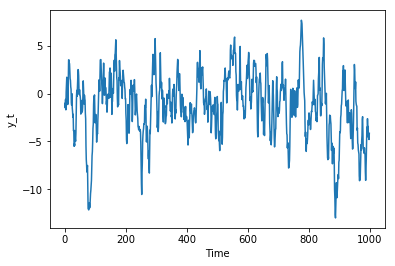

In [108]:
N = 1000

Β = 0.99
α = 1/3
ρ = 0.9
Χ = 1.

ϵ = np.random.randn(N)

_ = simulate(α, Β, Χ, ρ, ϵ, N)

# The time series follows the random shocks but remains stable

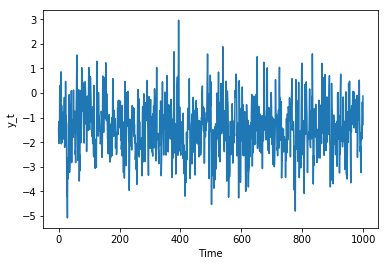

In [103]:
ρ = 0.1
_ = simulate(α, Β, Χ, ρ, ϵ, N)
# This time series follows the random shocks and also remains stable, 
# but is in a tighter range than the previous time series


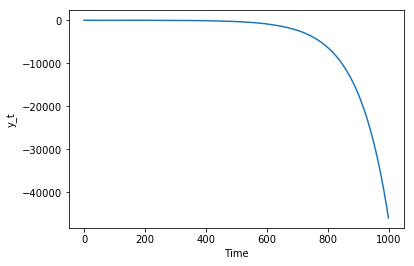

In [104]:
ρ = 1.01
_ = simulate(α, Β, Χ, ρ, ϵ, N)

# Here we see the time series diverge

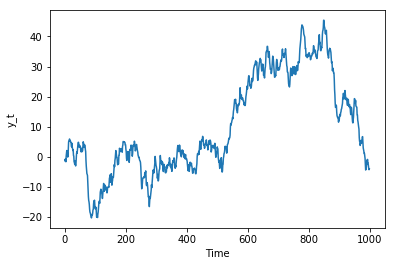

In [109]:
ρ = 1.
_ = simulate(α, Β, Χ, ρ, ϵ, N)
#_ = simulate(α, Β, Χ, ρ, np.random.randn(N), N)

# even with t=1000, we don't always see this time series remains stable, but it should
# the standard deviation of the time series has once again increased.

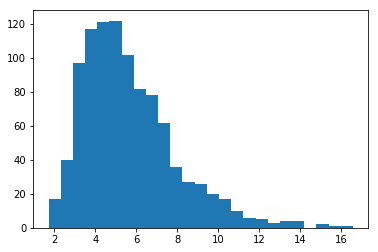

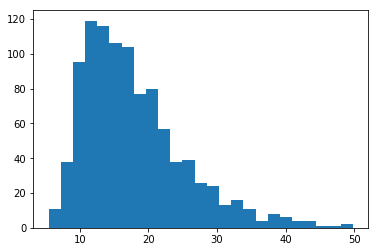

In [74]:
ρ = 1.
max_iter = 1000
N_loop = 100
plt.hist([np.std(simulate(α, Β, Χ, ρ, np.random.randn(N_loop), N_loop, show_plot=False)) for i in range(max_iter)], bins=25);
plt.show()
N_loop = 1000
plt.hist([np.std(simulate(α, Β, Χ, ρ, np.random.randn(N_loop), N_loop, show_plot=False)) for i in range(max_iter)], bins=25);
plt.show()


I_t / C_t converges to 33.3333333333333


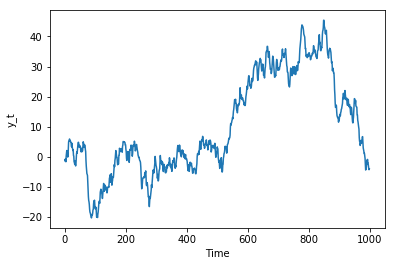

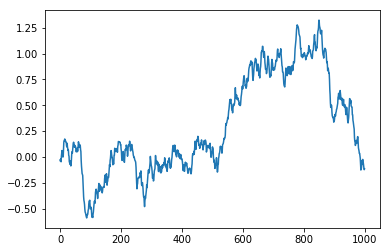

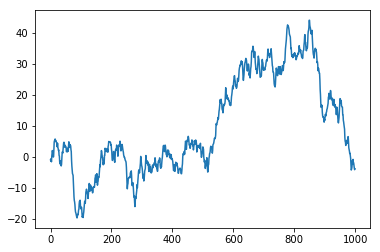

σ_c: 0.4732087965166666
σ_i: 15.773626550555537
σ_y: 16.246835347072203

The ratio of the standard deviations is 0.02912621359223304 and 0.970873786407767 respectively
This sums to 1 (0.02912621359223304 + 0.970873786407767 = 1.0).


In [121]:
n = 10000
γ = α*((1.-Β**n)/(1.-Β))
print("I_t / C_t converges to {}".format(γ))
ρ = 1.
N = 1000
Y = simulate(α, Β, Χ, ρ, ϵ, N)

C = [Y[2:][t]/(1+γ) for t in range(N)]
I = [Y[2:][t] - C[t] for t in range(N)]
plt.plot(C)
plt.show()
plt.plot(I)
plt.show()
print("σ_c: {}\nσ_i: {}\nσ_y: {}\n".format(np.std(C), np.std(I), np.std(Y[2:])))

print("The ratio of the standard deviations is {} and {} respectively".format(np.std(C)/np.std(Y[2:]), np.std(I)/np.std(Y[2:])))
print("This sums to 1 ({} + {} = {}).".format(np.std(C)/np.std(Y[2:]), 
                                              np.std(I)/np.std(Y[2:]), 
                                              np.round(np.std(C)/np.std(Y[2:])+np.std(I)/np.std(Y[2:]), 2)))

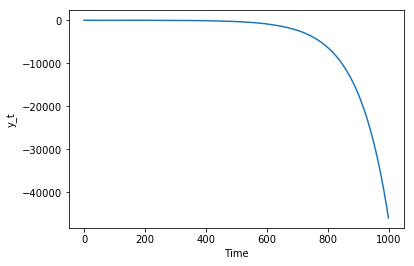

In [102]:
ρ = 1.01
_ = simulate(α, Β, Χ, ρ, ϵ, N)

# Here we see the time series diverge